# Titanic Exercise

to install seaborn :
```bash
conda install -c conda-forge seaborn
````


In [2]:
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [3]:
embarked_labels = {
  "C": "Cherbourg",
  "Q": "Queenstown",
  "S": "Southampton",
}

In [4]:
# 1. Load the dataset
titanic = load_dataset("titanic")
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 2. Data cleaning
# 2.1. Check the missing values
print(titanic.shape)
print(titanic.isnull().sum())

# 2.2. Replace the missing values in age with the mean
titanic["age"].fillna(titanic["age"].mean())

# 2.3 Drop the empty rows for embarcked
titanic.dropna(subset=["embarked"], inplace=True)

print(titanic.isnull().sum())
print(titanic.shape)

(891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64
(889, 15)


In [7]:
# 3 Analyse data
# 3.1 Calculer le taux global de survie des passagers du Titanic.
survival_rate = titanic["survived"].mean() * 100
print(f"Overall survival rate: {survival_rate}")

Overall survival rate: 38.24521934758155


In [8]:
# 3.2 Analyser la répartition des passagers par classe (Pclass) et par port d'embarquement (Embarked).
distribution_classes = titanic.groupby(["pclass", "embarked"]).size()
distribution_by_class = titanic.groupby(["pclass", "embarked"]).size().reset_index(name="count")
# print(distribution_by_class)
distribution_by_class['Percentage'] = distribution_by_class["count"] / distribution_by_class.groupby('pclass')["count"].transform('sum') * 100
print(distribution_by_class)

   pclass embarked  count  Percentage
0       1        C     85   39.719626
1       1        Q      2    0.934579
2       1        S    127   59.345794
3       2        C     17    9.239130
4       2        Q      3    1.630435
5       2        S    164   89.130435
6       3        C     66   13.441955
7       3        Q     72   14.663951
8       3        S    353   71.894094


In [20]:
# 3.3 Calculer la proportion de passagers masculins et féminins.
male_proportion = titanic[titanic['sex'] == "male"]["sex"].count() / len(titanic) * 100
gender_proportion = pd.Series([male_proportion, 100 - male_proportion], index=["male", "female"], name="Gender proportion")

gender_proportion = titanic['sex'].value_counts(normalize=True) * 100
print(gender_proportion)


sex
male      64.904387
female    35.095613
Name: proportion, dtype: float64


In [22]:
# 3.4 Identifier la distribution d'âge des passagers et trouver les catégories d'âge les plus représentées.
age_distribution = titanic["age"].value_counts().sort_index()
most_represented_age_categories = age_distribution.idxmax()
print(f"Age distribution: \n{age_distribution}", end="\n\n")
print(f"Most represented age categories: {most_represented_age_categories}")

Age distribution: 
age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

Most represented age categories: 24.0


In [23]:
# Create age categories
bins = [0, 18, 30, 50, 100]  # Define your age bins as needed
labels = ['0-17', '18-29', '30-49', '50+']  # Label each bin

# Cut the 'Age' column into the specified bins
titanic['Age_Category'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=False)
print(titanic['Age_Category'].value_counts())

Age_Category
18-29    271
30-49    255
0-17     113
50+       73
Name: count, dtype: int64


In [29]:
# 4 Alives analyse
# 4.1 Analyser la survie en fonction de la classe des billets (Pclass)
survival_by_class = titanic.groupby(["pclass", "survived"]).size().reset_index(name="count")
survival_by_class['Percentage'] = survival_by_class["count"] / survival_by_class.groupby('pclass')["count"].transform('sum') * 100
print(f"Survival by class: \n{survival_by_class}", end="\n\n")

survival_by_class = titanic.groupby('pclass')['survived'].value_counts().unstack()
print(survival_by_class)


Survival by class: 
   pclass  survived  count  Percentage
0       1         0     80   37.383178
1       1         1    134   62.616822
2       2         0     97   52.717391
3       2         1     87   47.282609
4       3         0    372   75.763747
5       3         1    119   24.236253

survived    0    1
pclass            
1          80  134
2          97   87
3         372  119


In [31]:
# 4.2 Examiner la survie en fonction du genre (Sex) des passagers.
survival_by_gender = titanic.groupby(["sex", "survived"]).size().reset_index(name="count")
survival_by_gender['Percentage'] = survival_by_gender["count"] / survival_by_gender.groupby('sex')["count"].transform('sum') * 100
print(f"Survival by gender: \n{survival_by_gender}", end="\n\n")

survival_by_gender = titanic.groupby('sex')['survived'].value_counts(normalize=True).unstack() * 100
print(survival_by_gender)

Survival by gender: 
      sex  survived  count  Percentage
0  female         0     81   25.961538
1  female         1    231   74.038462
2    male         0    468   81.109185
3    male         1    109   18.890815

survived          0          1
sex                           
female    25.961538  74.038462
male      81.109185  18.890815


In [34]:
# 4.3 Étudier la survie en fonction de l'âge (Age) des passagers.
survival_by_age = titanic.groupby(["age", "survived"]).size().reset_index(name="count")
survival_by_age['Percentage'] = survival_by_age["count"] / survival_by_age.groupby('age')["count"].transform('sum') * 100
print(f"Survival by age: \n{survival_by_age}", end="\n\n")

survival_by_age = titanic.groupby('age')['survived'].value_counts().unstack()
print(survival_by_age)

Survival by age: 
       age  survived  count  Percentage
0     0.42         1      1       100.0
1     0.67         1      1       100.0
2     0.75         1      2       100.0
3     0.83         1      2       100.0
4     0.92         1      1       100.0
..     ...       ...    ...         ...
137  70.00         0      2       100.0
138  70.50         0      1       100.0
139  71.00         0      2       100.0
140  74.00         0      1       100.0
141  80.00         1      1       100.0

[142 rows x 4 columns]

survived    0    1
age               
0.42      NaN  1.0
0.67      NaN  1.0
0.75      NaN  2.0
0.83      NaN  2.0
0.92      NaN  1.0
...       ...  ...
70.00     2.0  NaN
70.50     1.0  NaN
71.00     2.0  NaN
74.00     1.0  NaN
80.00     NaN  1.0

[88 rows x 2 columns]


In [37]:
# Create age categories
bins = [0, 18, 30, 50, 100]  # Define your age bins as needed
labels = ['0-17', '18-29', '30-49', '50+']  # Label each bin

# Cut the 'Age' column into the specified bins
titanic['Age_Category'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=False)
print(titanic['Age_Category'].value_counts())

# Calculate survival rates in each age category
survival_by_age = titanic.groupby('Age_Category')['survived'].value_counts(normalize=True).unstack() * 100

# Print the result
(survival_by_age)

Age_Category
18-29    271
30-49    255
0-17     113
50+       73
Name: count, dtype: int64


/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_2349/3241443154.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = titanic.groupby('Age_Category')['survived'].value_counts(normalize=True).unstack() * 100


survived,0,1
Age_Category,,
0-17,46.017699,53.982301
18-29,64.944649,35.055351
30-49,58.431373,41.568627
50+,64.383562,35.616438


In [38]:
print("\n\n======== 4.4 Analyze survival based on port of embarcation (Embarked). =========")
survival_by_port = titanic.groupby(["embarked", "survived"]).size().reset_index(name="count")
survival_by_port['Percentage'] = survival_by_port["count"] / survival_by_port.groupby('embarked')["count"].transform('sum') * 100
print(f"Survival by port: \n{survival_by_port}", end="\n\n")

survival_by_embarkation = titanic.groupby('embarked')['survived'].value_counts(normalize=True).unstack() * 100
print(survival_by_embarkation)



======== 4.4 Analyze survival based on port of embarcation (Embarked). =========
Survival by port: 
  embarked  survived  count  Percentage
0        C         0     75   44.642857
1        C         1     93   55.357143
2        Q         0     47   61.038961
3        Q         1     30   38.961039
4        S         0    427   66.304348
5        S         1    217   33.695652

survived          0          1
embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.304348  33.695652


In [39]:
# 4.5 Analyze survival based on family size.
print("\n\n======== 4.5 Analyze survival based on family size. =========")
survival_by_family_size = titanic.groupby(["sibsp", "survived"]).size().reset_index(name="count")
survival_by_family_size['Percentage'] = survival_by_family_size["count"] / survival_by_family_size.groupby('sibsp')["count"].transform('sum') * 100
print(f"Survival by family size: \n{survival_by_family_size}", end="\n\n")



======== 4.5 Analyze survival based on family size. =========
Survival by family size: 
    sibsp  survived  count  Percentage
0       0         0    398   65.676568
1       0         1    208   34.323432
2       1         0     97   46.411483
3       1         1    112   53.588517
4       2         0     15   53.571429
5       2         1     13   46.428571
6       3         0     12   75.000000
7       3         1      4   25.000000
8       4         0     15   83.333333
9       4         1      3   16.666667
10      5         0      5  100.000000
11      8         0      7  100.000000



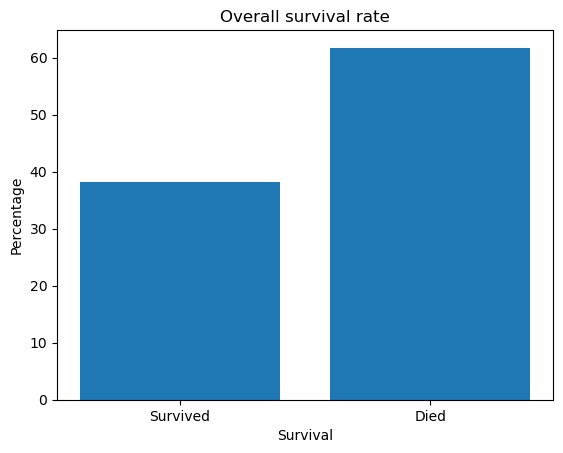

In [41]:
# 5 Plottings
# 5.1 Create a bar chart (plt.bar) to visualize the overall survival rate.
plt.bar(["Survived", "Died"], [survival_rate, 100 - survival_rate])
plt.title("Overall survival rate")
plt.xlabel("Survival")
plt.ylabel("Percentage")
plt.show()

embarked   C   Q    S
pclass               
1         85   2  127
2         17   3  164
3         66  72  353


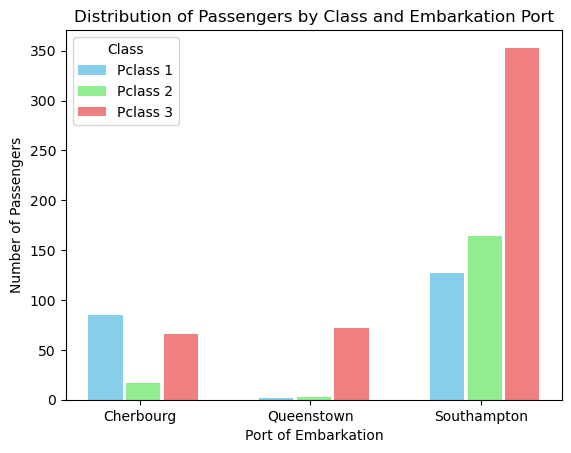

In [55]:
distribution_by_class_embarked = titanic.groupby(['pclass', 'embarked']).size().unstack()
print(distribution_by_class_embarked)
fig, ax = plt.subplots()
width = 0.2
class_labels = distribution_by_class_embarked.columns.map(embarked_labels.get)
for i, (pclass, color) in enumerate(zip(distribution_by_class_embarked.index, ["skyblue", "lightgreen", "lightcoral"])):
  positions = list(range(len(class_labels))) if i==0 else [pos + width + 0.02 for pos in positions]
  plt.bar(positions, distribution_by_class_embarked.loc[pclass], width=width, label=f'Pclass {pclass}', color=color)

# Adding labels and title
plt.title('Distribution of Passengers by Class and Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.xticks([pos + width for pos in range(len(class_labels))], class_labels)
plt.legend(title='Class')

# Show the plot
plt.show()

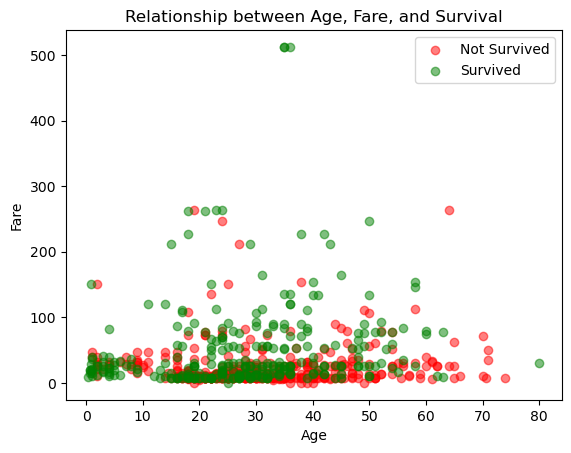

In [60]:
# 5.3 Créer un nuage de points (plt.scatter) pour représenter la relation entre l'âge (Age) et le prix du billet (Fare) en fonction de la survie.
# Plotting for non-survivors
plt.scatter(
    titanic[titanic['survived'] == 0]['age'], 
    titanic[titanic['survived'] == 0]['fare'],
    color='red', label='Not Survived', alpha=0.5
  )

# Plotting for survivors
plt.scatter(
    titanic[titanic['survived'] == 1]['age'], 
    titanic[titanic['survived'] == 1]['fare'],
    color='green', label='Survived', alpha=0.5
  )

# Adding labels and title
plt.title('Relationship between Age, Fare, and Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

# Show the plot
plt.show()

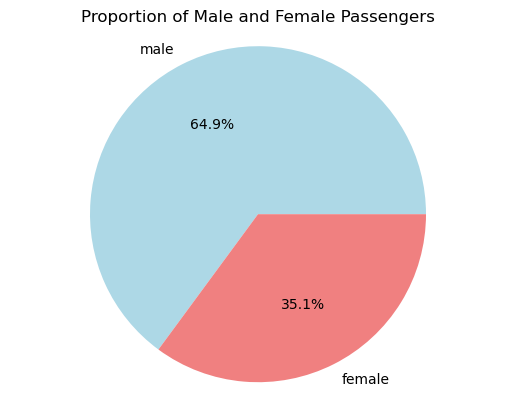

In [58]:
# 5.4 Produire un diagramme circulaire (Pie chart) pour montrer la proportion de passagers masculins et féminins.
gender_proportion = titanic['sex'].value_counts(normalize=True)

# Plotting the pie chart
labels = gender_proportion.index
sizes = gender_proportion.values
colors = ['lightblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Adding title
plt.title('Proportion of Male and Female Passengers')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

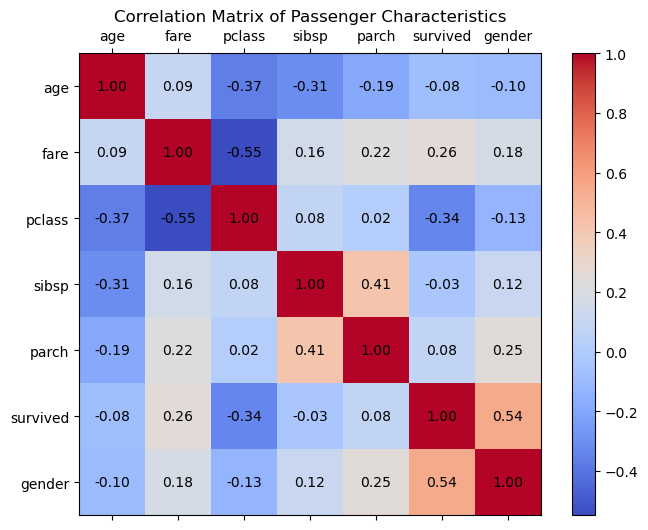

In [61]:
# 6 Bonus for the datascients experts ;P

# 6.1 Examine the correlation between different passenger characteristics to identify meaningful relationships.
# Select relevant columns for correlation analysis
correlation_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived', 'gender']

titanic['gender'] = titanic['sex'].map({'male': 0, 'female': 1})
# Create a correlation matrix
correlation_matrix = titanic[correlation_columns].corr()

# Create a basic heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

# Set labels
ax.set_xticks(np.arange(len(correlation_columns)))
ax.set_yticks(np.arange(len(correlation_columns)))
ax.set_xticklabels(correlation_columns)
ax.set_yticklabels(correlation_columns)

# Display the correlation values
for i in range(len(correlation_columns)):
  for j in range(len(correlation_columns)):
    text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Set title
plt.title('Correlation Matrix of Passenger Characteristics')

# Show the plot
plt.show()

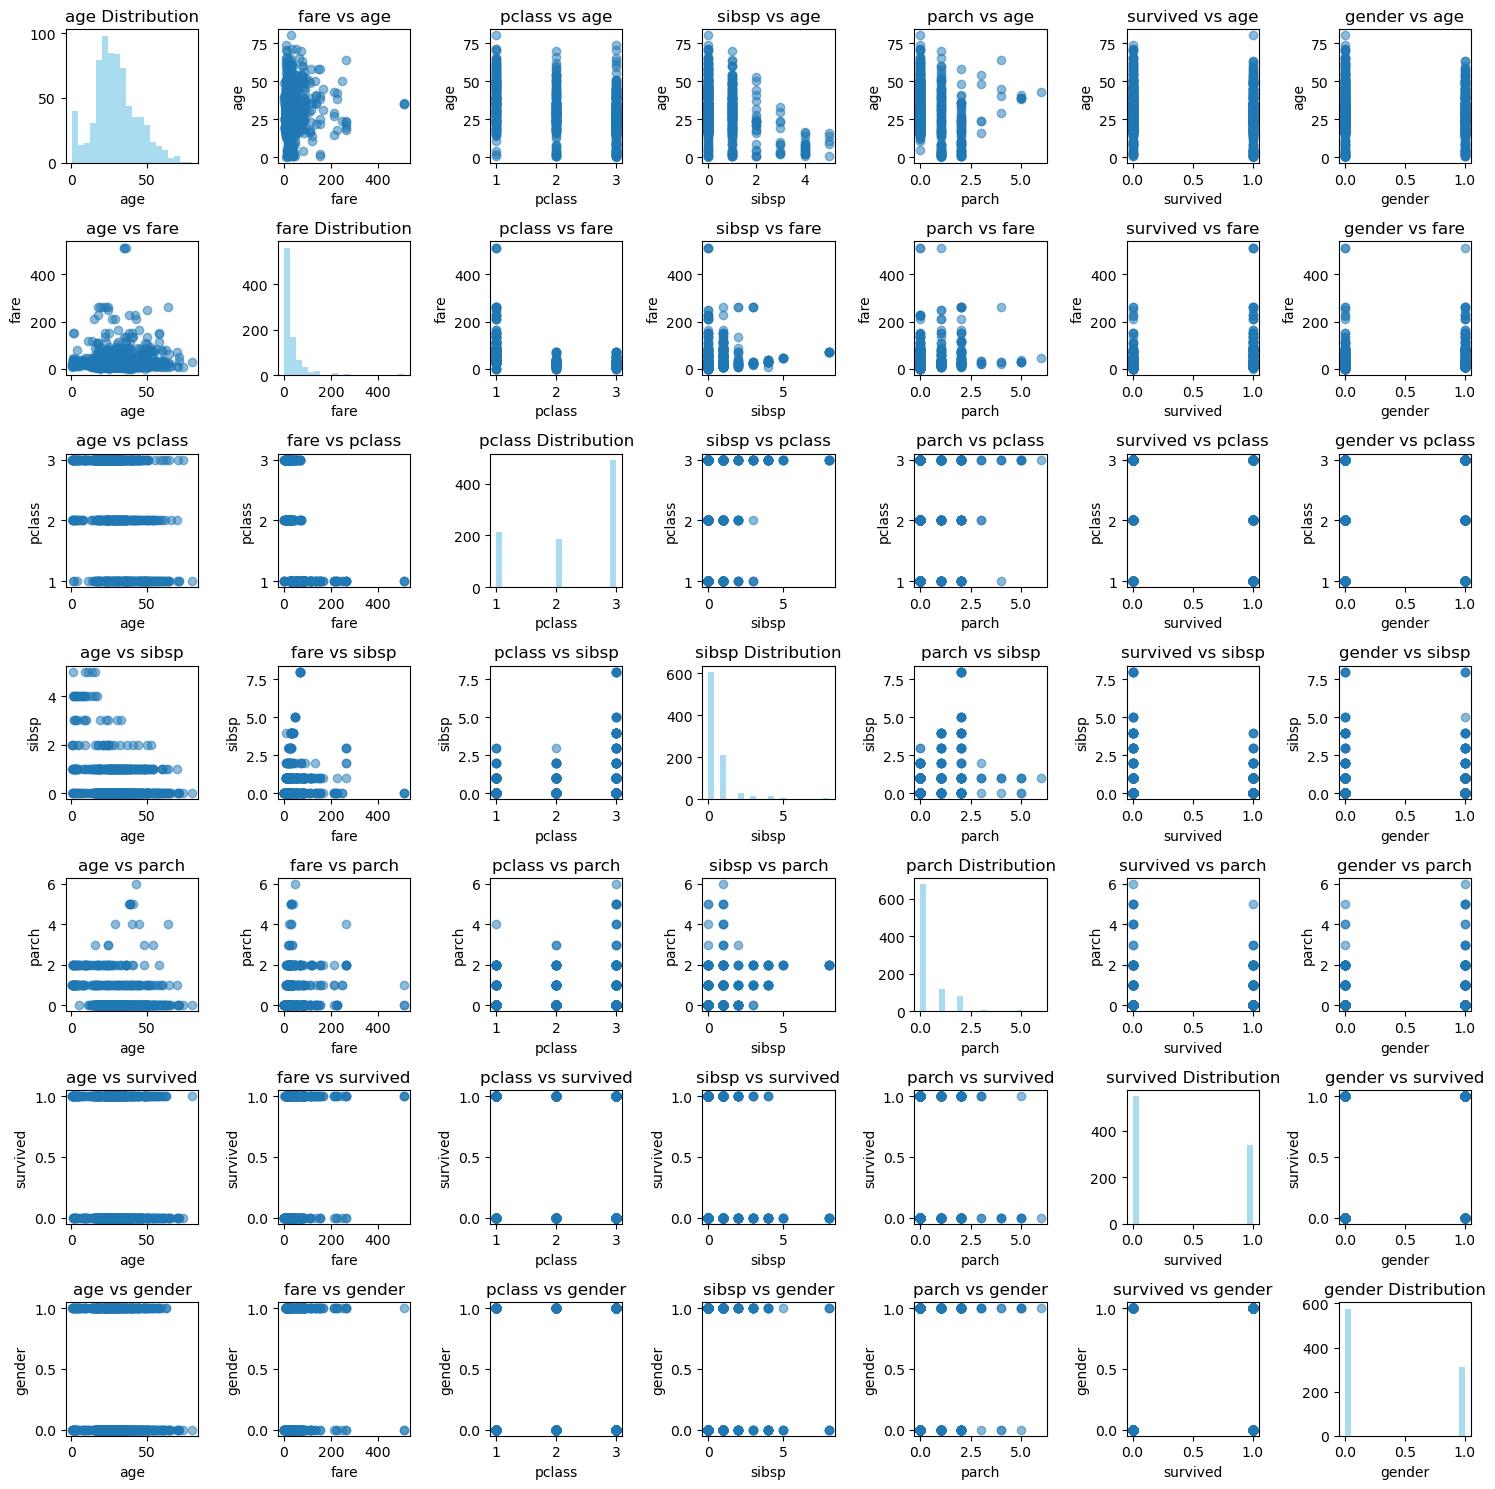

In [62]:
# Select relevant numerical columns
numerical_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived', 'gender']

# Create a matrix of scatter plots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=len(numerical_columns), figsize=(15, 15))

for i in range(len(numerical_columns)):
    for j in range(len(numerical_columns)):
        if i == j:
            axes[i, j].hist(titanic[numerical_columns[i]], bins=20, color='skyblue', alpha=0.7)
            axes[i, j].set_title(f'{numerical_columns[i]} Distribution')
            axes[i, j].set_xlabel(numerical_columns[i])
        else:
            axes[i, j].scatter(titanic[numerical_columns[j]], titanic[numerical_columns[i]], alpha=0.5)
            axes[i, j].set_title(f'{numerical_columns[j]} vs {numerical_columns[i]}')
            axes[i, j].set_xlabel(numerical_columns[j])
            axes[i, j].set_ylabel(numerical_columns[i])

# Adjust layout
plt.tight_layout()
plt.show()